In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load and partition the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
# Normalize the pixel values between 0-1
x_train = x_train/255.0
x_test = x_test/255.0
# Expand the dimensions Original shape: (batch_size, height, width) Expanded shape: (batch_size, height, width, 1)
x_train = tf.expand_dims(x_train, 3)
x_test = tf.expand_dims(x_test, 3)
# Split the validation dataset
x_val = x_train[:5000]
y_val = y_train[:5000]

In [22]:
# Implement the LeNet-5 Model
lenet_5_model = keras.Sequential()
# C1 Convolution Layer
lenet_5_model.add(keras.layers.Conv2D(6, kernel_size=5, strides= 1, activation = 'tanh', input_shape= x_train[0].shape, padding='same'))
# S2 Sub Sampling Layer
lenet_5_model.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
# C3 Convolution Layer
lenet_5_model.add(keras.layers.Conv2D(16, kernel_size=5, strides= 1, activation = 'tanh', input_shape= x_train[0].shape, padding='valid'))
# S4 SubSampling Layer
lenet_5_model.add(keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
# C5 Convolution Layer
lenet_5_model.add(keras.layers.Conv2D(120, kernel_size=5, strides= 1, activation = 'tanh', input_shape= x_train[0].shape, padding='valid'))
# Flatten for FF NN
lenet_5_model.add(keras.layers.Flatten())
# F6 Dense fully connected layer
lenet_5_model.add(keras.layers.Dense(84, activation='tanh'))
# Output Layer
lenet_5_model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
# Compile the model
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [24]:
# Train the model
lenet_5_model.fit(x_train, y_train, epochs=5, validation_data=(x_val,y_val))

Epoch 1/5


2024-08-11 21:22:01.527557: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-08-11 21:22:02.087696: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f028cf8c5c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-11 21:22:02.087745: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2024-08-11 21:22:02.124849: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1723391522.358176   22143 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2294 - accuracy: 0.9313 - val_loss: 0.0843 - val_accuracy: 0.9768
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0848 - accuracy: 0.9738 - val_loss: 0.0554 - val_accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0368 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0307 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0281 - val_accuracy: 0.9912


In [25]:
# Evaluate the model on test data
lenet_5_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9806


[0.05827999860048294, 0.9805999994277954]

1/1 [==============================] - 0s 22ms/step
1


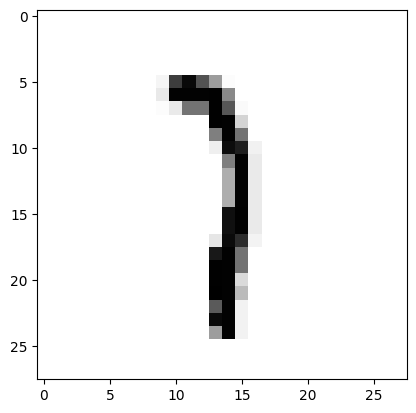

In [41]:
# Plot the Image
image_index = 1260
plt.imshow(x_test[image_index], cmap='Greys')

# Make Prediction
pred = lenet_5_model.predict(tf.expand_dims(x_test[image_index],0))
print(pred.argmax())